[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



**Problem 2**. Analyze the Carbon_West data file using the following code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [ ]:
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
carbon_west.head(10)



,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


In [ ]:
carbon_west.shape

(35, 2)

In [ ]:
# max C02
carbon_west['CO2'].max()

16.5

Part a. Construct a histogram of CO2 emissions.

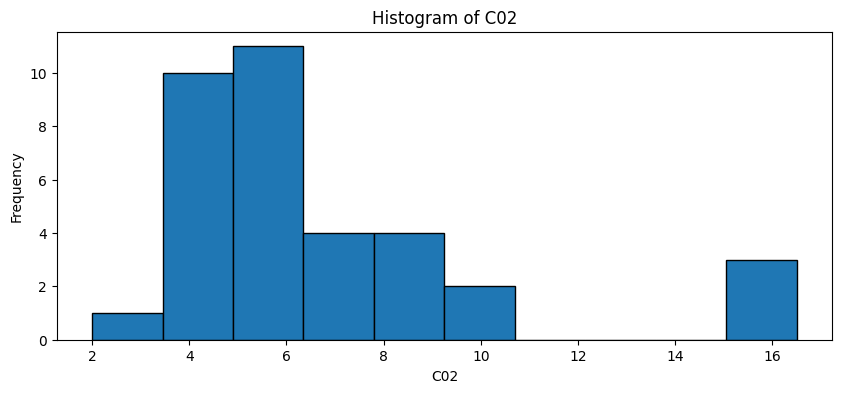

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.title(f'Histogram of C02')
plt.xlabel("C02")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [ ]:
#mean
meanValue = carbon_west['CO2'].mean()
medianValue = carbon_west['CO2'].median()
stdValue = carbon_west['CO2'].std()
print(f'mean: {meanValue}')
print(f'median: {medianValue}')
print(f'standard deviation: {stdValue}')

mean: 6.717142857142858
median: 5.9
standard deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [ ]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders.head(10)

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6
5,CO,3.9
6,CT,2.8
7,DE,5.6
8,FL,5.0
9,GA,6.7


Part a. Find the mean and standard deviation for murders without D.C.

In [ ]:
exclude_DC = murders[murders['state'] != 'DC']
meanValue = exclude_DC['murder'].mean()
stdValue = exclude_DC['murder'].std()
print(f'mean: {meanValue}')
print(f'standard deviation: {stdValue}')

mean: 4.874
standard deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [ ]:
# Calculate the five-number summary
minimum = np.min(exclude_DC['murder'])
q1 = np.percentile(exclude_DC['murder'], 25)
median = np.median(exclude_DC['murder'])
q3 = np.percentile(exclude_DC['murder'], 75)
maximum = np.max(exclude_DC['murder'])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [ ]:
minimum = np.min(murders['murder'])
q1 = np.percentile(murders['murder'], 25)
median = np.median(murders['murder'])
q3 = np.percentile(murders['murder'], 75)
maximum = np.max(murders['murder'])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

#The median was affected more by this outlier. The quartile range for 3rd changed a lot more than 1st quartile and including the median.

Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [ ]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(10)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


In [ ]:
houses.size

700

In [ ]:
x = houses['size']
print(x.size)

100


In [ ]:
y = houses['price']
print(y.size)

100


Part a. Construct a scatterplot between square feet and price of a home.

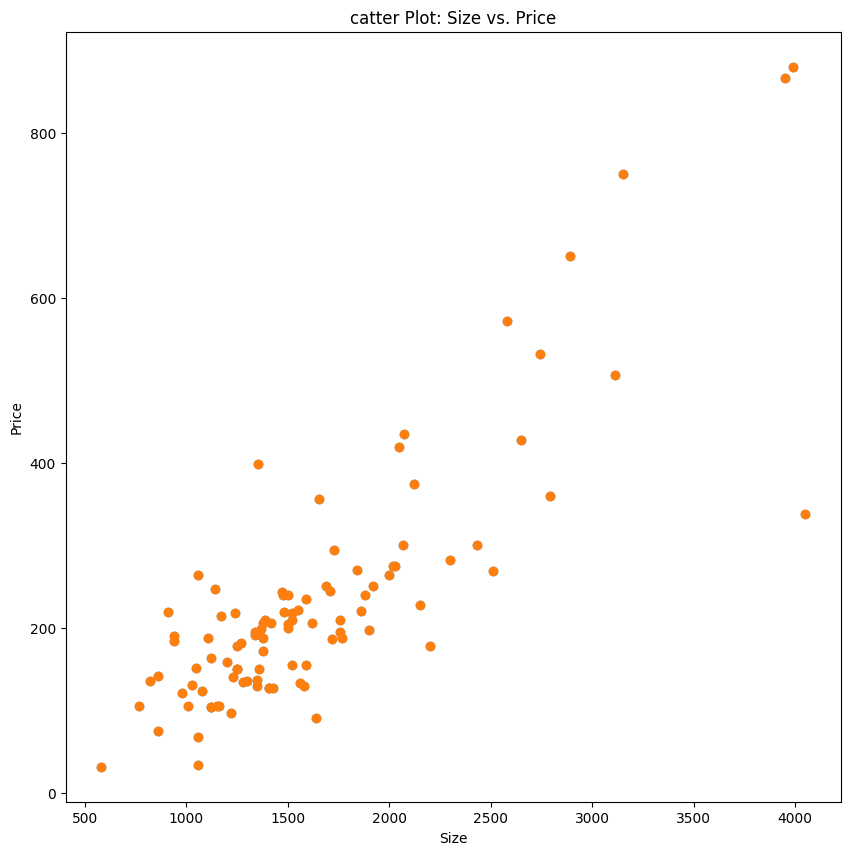

In [ ]:
y = houses['price']
x = houses['size']

plt.figure(figsize=(10, 10))
plt.scatter(x, y, alpha=0.7)
plt.scatter(x, y)
plt.title(f'catter Plot: Size vs. Price')
plt.xlabel("Size")
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [ ]:
# Calculate the correlation between "price" and "size"
correlation = houses['size'].corr(houses['price'])

print(f'Correlation between size and price: {correlation}')

Correlation between size and price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

In [ ]:
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_  # This tells you where the line crosses the y-axis (the score axis) when (x) is zero

# Print the regression results
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}') #what does the negative number mean???


Slope (Coefficient): 0.18989116794379637
Intercept: -76.3893821074686


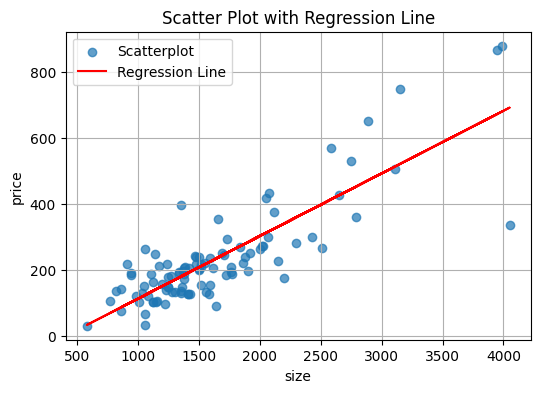

In [ ]:
# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

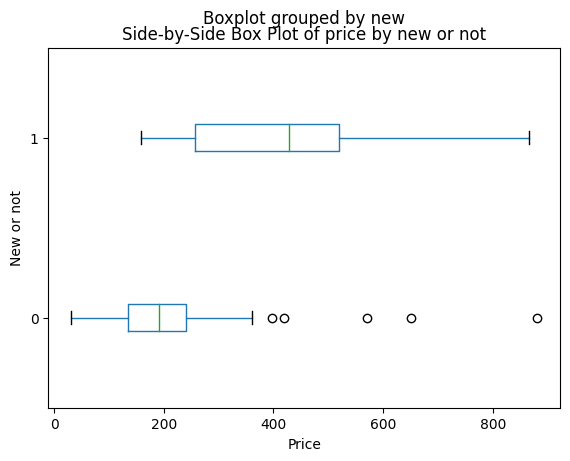

In [ ]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of price by new or not')
plt.xlabel('Price')
plt.ylabel('New or not')
plt.show()

In [ ]:
mean_price_of_newHome = houses.groupby('new')['price'].mean()
mean_price_of_newHome

,price
new,
0,207.851124
1,436.445455


Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Answer: The mean price of a new home is 436.5compared to an old home  that has a mean of 207.85


**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [ ]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')
happy.head(10)

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
5,6,1,1,male
6,7,1,1,male
7,8,1,1,male
8,9,1,1,male
9,10,1,1,male


In [ ]:
#Comparing categorical with categorical using contingency table
pd.crosstab(happy["happiness"],happy["marital"])

marital,1,2,3
happiness,,,
1,432,92,124
2,504,282,409
3,61,103,135
